In [1]:
import networkx as nx 
import osmnx as ox 
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.colors as colors
import matplotlib as mpl
#from funcs_e import *
import grinpy
import numpy as np
import pandas as pd
import pickle


In [ ]:
import pickle

# Load graph

with open(r"C:\Users\anton\Desktop\Master-Oppgave\Kode\New_Traffic\data\BaseGraph_E_NOR_wagrades.pickle", 'rb') as file:
    H = pickle.load(file)


In [170]:
#Converted into a dataframe to view the data
import pandas as pd

# Extract node data
node_data = {node_id: data for node_id, data in H.nodes(data=True)}
node_df = pd.DataFrame.from_dict(node_data, orient='index')

# Extract edge data
edge_data = [data for source, target, data in H.edges(data=True)]
edge_df = pd.DataFrame(edge_data)



In [ ]:
ox.plot_graph(H, figsize = (15, 30), node_color="blue", edge_color = "red", bgcolor = "white", node_size=1, edge_linewidth = 1)

In [172]:
# Computes some summary statistics of the basegraph

density = nx.density(H)
deg = sorted(H.degree, key=lambda x: x[1], reverse=True)
deg = [n[1] for n in deg]
print("Nodes:\t\t\t", len(H.nodes))
print("Edges:\t\t\t", len(H.edges))
print("Network density:\t", round(density,4))
print("Maximum degree:\t\t", max(deg))
print("Average degree:\t\t", round(np.mean(deg), 4))

Nodes:			 6944
Edges:			 9807
Network density:	 0.0004
Maximum degree:		 5
Average degree:		 2.8246


In [173]:
# Store degrees, count them and create list containing histogram values

degrees = dict(H.degree()) # dictionary node:degree
values = sorted(set(degrees.values())) 
hist = [list(degrees.values()).count(x) for x in values]

In [24]:
#A little messed up graph png but works to display regularly through output

plt.figure(figsize = (15,10))
plt.bar(values, hist) # in-degree
plt.xlabel('Degree' , fontsize = 15)
plt.ylabel('Number of nodes' , fontsize = 15)
plt.tick_params(axis='both', which='major', labelsize=15)
plt.savefig('/Users/antonglad/Master/road_env/figures/degree_dist.png', dpi = 400, bbox_inches = 'tight')
plt.close()

In [26]:
# Retrieve absolute value of gradients

lengths = []
for i in H.edges:
    length = H.edges[i]['length']
    lengths.append(length)

grades = [abs(H.edges[i]['wa_grade']) for i in H.edges]  

In [27]:
plt.figure(figsize = (15,10))
sns.scatterplot(x = lengths, y = grades)
plt.xlabel('Length', fontsize = 15)
plt.ylabel('Abs. gradient', fontsize = 15)
plt.tick_params(axis='both', which='major', labelsize=15)
plt.savefig('/Users/antonglad/Master/road_env/figures/lengths_gradient_scatter.png', dpi = 400, bbox_inches = 'tight')
plt.close()

In [174]:
#Create grades and elevations from H.nodes
grades = [H.edges[i]['wa_grade'] for i in H.edges]
#elevations = [H.nodes[i]['elevation'] if float('-inf') < H.nodes[i]['elevation'] < float('inf') else 0 for i in H.nodes]
elevations = [H.nodes[i]['elevation'] if np.all(np.logical_and(float('-inf') < H.nodes[i]['elevation'], H.nodes[i]['elevation'] < float('inf'))) else 0 for i in H.nodes]


In [175]:
#Functions necessary for next cell 

def outlier_aware_hist(data, lower=None, upper=None):
    if not lower or lower < min(data):
        lower = min(data)
        lower_outliers = False
    else:
        lower_outliers = True

    if not upper or upper > max(data):
        upper = max(data)
        upper_outliers = False
    else:
        upper_outliers = True

    n, bins, patches = plt.hist(data, range=(lower, upper), bins=25, edgecolor = 'white')

    if lower_outliers:
        n_lower_outliers = (data < lower).sum()
        patches[0].set_height(patches[0].get_height() + n_lower_outliers)
        patches[0].set_facecolor('c')
        patches[0].set_label('Lower outliers: ({:.2f}, {:.2f})'.format(min(data), lower))

    if upper_outliers:
        n_upper_outliers = (data > upper).sum()
        patches[-1].set_height(patches[-1].get_height() + n_upper_outliers)
        patches[-1].set_facecolor('m')
        patches[-1].set_label('Upper outliers: ({:.2f}, {:.2f})'.format(upper, max(data)))

    if lower_outliers or upper_outliers:
        plt.legend(prop={'size': 12})


def mad(data):
    median = np.median(data)
    diff = np.abs(data - median)
    mad = np.median(diff)
    return mad

def calculate_bounds(data, z_thresh=15):
    MAD = mad(data)
    median = np.median(data)
    const = z_thresh * MAD / 0.6745
    return (median - const, median + const)

In [ ]:

plt.figure(figsize = (10,10))
# plt.title("Distribution of grade, with binned outliers")
plt.xlabel("Grade (%)", fontsize = 15)
plt.tick_params(axis='both', which='major', labelsize=15)

outlier_aware_hist(grades, *calculate_bounds(grades))
plt.savefig("/Users/antonglad/Master/road_env/figures/dist_grade_binnedoutliers.png", dpi = 400, bbox_inches = 'tight') 

In [184]:
node_df = nx.to_pandas_edgelist(H)
print("Node Data:")
print(node_df)

node_df.to_excel("node_dataframe.xlsx")

/Users/antonglad/opt/anaconda3/lib/python3.8/site-packages/pandas/core/dtypes/cast.py:127: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  arr = construct_1d_object_array_from_listlike(values)


Node Data:
       source   target  ... isBridge roadclass
0      155191   155273  ...        0         0
1      155191   351348  ...        0         0
2      155191   155201  ...        0         0
3      155201   155289  ...        0         0
4      155201   351618  ...        0         0
...       ...      ...  ...      ...       ...
9802  1854885  1854918  ...        0         0
9803  1854885  1854904  ...        0         0
9804  1854888  1854919  ...        0         0
9805  1854888  1854905  ...        0         0
9806  1854918  1854920  ...        0         0

[9807 rows x 21 columns]


<ipython-input-184-e361ae8cc45e>:5: UserWarning: Pandas requires version '1.4.3' or newer of 'xlsxwriter' (version '1.3.8' currently installed).
  node_df.to_excel("node_dataframe.xlsx")


In [185]:
# display the edge data as a pandas DataFrame
edge_df = nx.to_pandas_edgelist(H, source="source", target="target")
print("\nEdge Data:")
print(edge_df)

/Users/antonglad/opt/anaconda3/lib/python3.8/site-packages/pandas/core/dtypes/cast.py:127: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  arr = construct_1d_object_array_from_listlike(values)



Edge Data:
       source   target  ... isBridge roadclass
0      155191   155273  ...        0         0
1      155191   351348  ...        0         0
2      155191   155201  ...        0         0
3      155201   155289  ...        0         0
4      155201   351618  ...        0         0
...       ...      ...  ...      ...       ...
9802  1854885  1854918  ...        0         0
9803  1854885  1854904  ...        0         0
9804  1854888  1854919  ...        0         0
9805  1854888  1854905  ...        0         0
9806  1854918  1854920  ...        0         0

[9807 rows x 21 columns]


In [186]:
edge_df.to_excel("edges_df.xlsx")

<ipython-input-186-294f1425198c>:1: UserWarning: Pandas requires version '1.4.3' or newer of 'xlsxwriter' (version '1.3.8' currently installed).
  edge_df.to_excel("edges_df.xlsx")


In [ ]:
H.edges()

In [ ]:
list(H.nodes(data=True))[0:5]
list(H.edges(data=True))[0:5]


*#Mapping the traffic registration points on the basegraph*

In [133]:
csv_pd=pd.read_csv("/Users/antonglad/Master/road_env/data/volume_data.csv")

In [134]:
#Creating lists for lat and lon, set method assures no duplicates
locs_x = csv_pd['lat'].tolist()
locs_y = csv_pd['lon'].tolist()



In [110]:
#Remove outliers from list of coordinates
# locs_x=[x for x in locs_x if x>0]
# locs_y=[y for y in locs_y if y>56]

In [138]:
#Create tuple with list of coordinate locations
coords=list(zip(locs_x, locs_y))


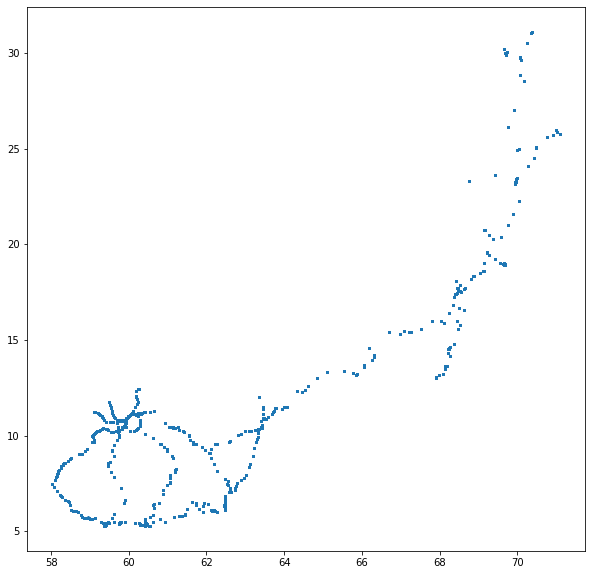

In [146]:
plt.figure(figsize=(10,10))
plt.scatter(x=locs_x, y=locs_y, s=1.5)
plt.show()
plt.close()

In [147]:
plt.close()

*#Load and analyze data on basegrpah of E roads*

In [148]:
import pickle

# Load graph

with open("C:\Users\anton\Desktop\Master-Oppgave\Kode\New_Traffic\data\BaseGraph_E_NOR_wagrades.pickle", 'rb') as file:
    H = pickle.load(file)

In [149]:
labels={n[1]:n[0] for n in enumerate(H.nodes)}

H=nx.relabel_nodes(H, labels)

In [150]:
tr=ox.get_nearest_nodes(H, locs_x, locs_y)

In [152]:
color_map=[]
size_map=[]

for i in H.nodes:
    if i in tr:
        color_map.append("blue")
        size_map.append(5)
    else:
        color_map.append("blue")
        size_map.append(0)
        

In [153]:
#Insert inversion of coordinate funciton
def get_inverted_latlon(graph, nodes = None):
    pos = {}
    if nodes is not None:
        for i in nodes:
            data = graph.nodes[i]
            x = float(data['x'])
            y = float(data['y'])
            pos[i] = (x,y)
    else:
        nodes = [n for n in graph.nodes()]
        for i in nodes:
            data = graph.nodes[i]
            x = float(data['x'])
            y = float(data['y'])
            pos[i] = (x,y)

    return pos

In [154]:

pos=get_inverted_latlon(H)

fig, (ax1, ax2)=plt.subplots(1,2, figsize=(25,14))
ax1.scatter(x=locs_x,y=locs_y, s=1.5)
ax1.axis=("off")
ax2=nx.draw(H, ax=ax2, pos=pos, node_size=size_map, node_color=color_map)
plt.savefig("/Users/antonglad/Master/road_env/figures/current_traffic_reg.png", dpi=400, bbox_inches="tight")
plt.close()


*#TESTING METHODS: HOW TO COMBINE VOLUME DATA AND WEIGHTS EDGES FROM ROAD NETWORK BY VOLUME *

In [187]:
import numpy as np
from scipy.spatial.distance import cdist

# define a function to find the closest edge in the graph to a given point
def closest_edge(G, point):
    nodes = np.array(G.nodes())
    node_coords = np.array([(node[0], node[1]) for node in nodes])
    dists = cdist([point], node_coords)
    closest_node_idx = np.argmin(dists)
    closest_node = nodes[closest_node_idx]
    closest_edge = G.edges(closest_node, data=True)[0]
    return closest_edge

In [188]:
csv_pd=pd.read_csv("/Users/antonglad/Master/road_env/data/volume_data.csv")

In [194]:
import numpy as np
from scipy.spatial.distance import cdist
import geopandas as gpd
import networkx as nx

# load road network
#G = nx.read_shp('path/to/your/road/network.shp')

# create road nodes array with latitude and longitude information
road_nodes = np.array([(node, data['geometry'].coords[0][0], data['geometry'].coords[0][1])
                      for node, data in H.nodes(data=True)])

# load traffic data
#traffic_data = gpd.read_file('path/to/your/traffic/data.shp')

# convert traffic data to numpy array
traffic_points = csv_pd[['lon', 'lat', 'volume']].values

# calculate distance matrix between traffic points and road nodes
dist_matrix = cdist(traffic_points[:, :2], road_nodes[:, 1:], metric='euclidean')

# find closest road node for each traffic point
min_indices = np.argmin(dist_matrix, axis=1)
min_distances = np.min(dist_matrix, axis=1)

# calculate total length of all edges in the graph
total_edge_length = sum([data['length'] for u, v, data in H.edges(data=True)])

# assign traffic flow to edges based on closest road node
for i, point in enumerate(traffic_points):
    node_id = road_nodes[min_indices[i], 0]
    edges = H.edges(node_id, data=True)
    total_distance = sum([data['length'] for u, v, data in edges])
    for u, v, data in edges:
        edge_weight = data['length']
        traffic_flow = point[2] * (edge_weight / total_distance)
        if 'traffic_flow' not in data:
            data['traffic_flow'] = traffic_flow
        else:
            data['traffic_flow'] += traffic_flow


In [ ]:
#list(H.nodes(data=True))[0:5]
list(H.edges(data=True))[0:5]

In [ ]:
import pulp

# Define the linear program
prob = pulp.LpProblem('B_Flow_Minimization', pulp.LpMinimize)

# Define the decision variables
f = pulp.LpVariable.dicts('f', ((u, v) for u, v, _ in H.edges), lowBound=0, upbound=edges['traffic_flow'], cat='Continuous')

# Define the objective function
prob += pulp.lpSum(f[(u, v)] for u, v, _ in H.edges)

# # Define capacity constraints
# for u, v, d in H.edges(data=True):
#     capacity = d['capacity']
#     prob += f[(u, v)] <= capacity

# Define flow conservation constraints
for v in H.nodes:
    inflow = pulp.lpSum(f[(u, v)] for u, _, _ in H.edges if u != v and v == _)
    outflow = pulp.lpSum(f[(v, w)] for _, w, _ in H.edges if v != w and v == _)
    prob += inflow - outflow == 0


# Solve the linear program
prob.solve()


In [271]:

# Check if the problem has an optimal solution
if pulp.LpStatus[prob.status] == 'Optimal':
    # Get the optimal objective value
    obj_val = pulp.value(prob.objective)
    print(f'Optimal objective value: {obj_val}')
else:
    print('No optimal solution found.')

Optimal objective value: 0.0


In [ ]:
E = nx.MultiGraph()
for u, v, attrs in edges(data=True):
    E.add_edge(u, v, traffic_flow=attrs['traffic_flow'])


In [260]:
print(f[(287773, 287783)].value())


0.0


In [ ]:

flow_df = nx.to_pandas_edgelist(H, source="source", target="target")
print("Edge Data:")

pd.set_option('display.max_columns', None)
node_df.head()

In [279]:
for (u, v) in f.keys():
    if f[(u, v)].value() != 0:
        print(f"Flow on edge ({u}, {v}): {f[(u, v)].value()}")
